In [2]:
# Import libraries and dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [10]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("joanne.env")

True

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Set the file paths to the CSVs using the Path class from the pathlib library
stock_csv_path = Path("Asset_Prices_Month.csv")
housing_csv_path = Path("Housing_prices_month_aggregate_clean.csv")

In [13]:

# Read the stocks data, set the `date` as the index
stocks_df = pd.read_csv(stock_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
house_price_df = pd.read_csv(housing_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

stocks_df.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76


<AxesSubplot:xlabel='Date'>

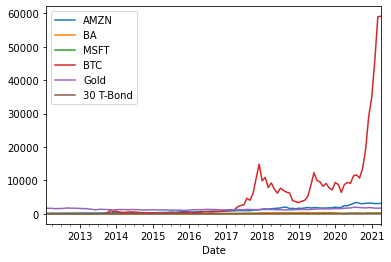

In [14]:
# Plot the data trends of the two variables over time
stocks_df.plot()

In [15]:








# Calculate the correlation
correlation = stocks_df.corr()

# Display de correlation matrix
correlation

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
AMZN,1.000000,0.576007,0.983154,0.735486,0.524567,-0.691376
BA,0.576007,1.000000,0.522784,0.269741,-0.113441,-0.124258
MSFT,0.983154,0.522784,1.000000,0.776143,0.562743,-0.728569
BTC,0.735486,0.269741,0.776143,1.000000,0.645120,-0.392672
Gold,0.524567,-0.113441,0.562743,0.645120,1.000000,-0.615138
30 T-Bond,-0.691376,-0.124258,-0.728569,-0.392672,-0.615138,1.000000


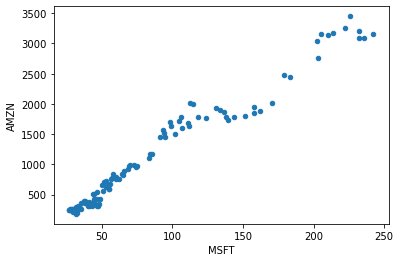

In [17]:
# Calculate and plot the correlation
correlation = stocks_df.corr()
correlation
stocks_df.plot(kind = "scatter", x="MSFT", y = "AMZN");

In [18]:
df_daily_returns = stocks_df.pct_change().dropna()
df_daily_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2013-11-30,0.081285,0.028736,0.076814,4.450260,-0.055585,0.052342
2013-12-31,0.013134,0.016685,-0.018883,-0.303446,-0.038864,0.036649
2014-01-31,-0.100554,-0.082277,0.011494,0.130777,0.031533,-0.088384
2014-02-28,0.009507,0.029219,0.012421,-0.325851,0.065817,-0.005540
2014-03-31,-0.071058,-0.026606,0.069956,-0.167128,-0.028530,-0.008357


In [ ]:
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

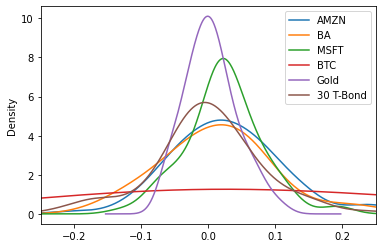

In [19]:
df_daily_returns.plot.density(xlim=[-.25,.25])

In [20]:
df_daily_returns.describe()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.027578,0.013239,0.023187,0.120396,0.003701,-0.001623
std,0.082901,0.106808,0.057355,0.519491,0.038806,0.080356
min,-0.202192,-0.457890,-0.130248,-0.374782,-0.065665,-0.225296
25%,-0.025756,-0.038114,-0.006208,-0.086349,-0.023050,-0.041905
50%,0.022552,0.016292,0.020314,0.053981,0.001887,-0.004404
75%,0.079783,0.061617,0.055575,0.233374,0.027971,0.042118
max,0.268900,0.459312,0.196262,4.450260,0.109897,0.241667


In [21]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([house_price_df, stocks_df], axis="columns", join="inner")
combined_df.head(10)

,Median Sale Price,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,,
2012-02-29,297736.8421,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,300131.5789,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,311921.0526,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,324657.8947,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,318684.2105,228.35,74.30,30.59,NaN,1604.2,2.76
2012-07-31,319342.1053,233.30,73.91,29.47,NaN,1612.4,2.56
2012-08-31,326789.4737,248.27,71.40,30.82,NaN,1685.3,2.68
2012-09-30,320000.0000,254.32,69.60,29.76,NaN,1776.1,2.82
2012-10-31,324000.0000,232.89,70.44,28.54,NaN,1721.3,2.85


In [22]:

combined_df.corr()['Median Sale Price'].to_frame().iloc[1:]

,Median Sale Price
AMZN,0.925388
BA,0.731449
MSFT,0.900481
BTC,0.781356
Gold,0.212930
30 T-Bond,-0.615141


<AxesSubplot:xlabel='Date'>

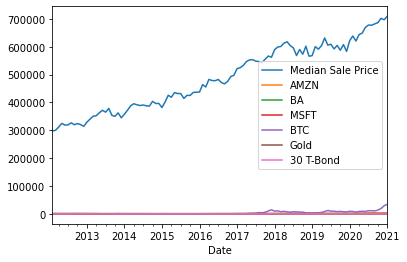

In [23]:
# Plot the data trends of the two variables over time
combined_df.plot()

<AxesSubplot:xlabel='Gold', ylabel='Median Sale Price'>

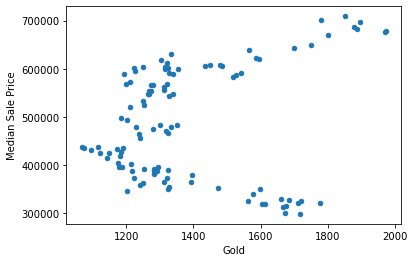

In [26]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='Gold', y='Median Sale Price')

In [27]:
house_csv_path = Path("housing_prices_month_clean.csv")
house_price_df = pd.read_csv(house_csv_path)
house_price_df.head()

,Region,Date,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
0,"Auburn, WA",1/31/2012,188,81,118,447,107,38,10
1,"Auburn, WA",2/29/2012,206,102,161,461,97,-10,17
2,"Auburn, WA",3/31/2012,197,97,149,439,88,-9,-9
3,"Auburn, WA",4/30/2012,209,127,168,443,73,-15,-26
4,"Auburn, WA",5/31/2012,225,109,147,415,58,-15,-20


In [28]:
house_price_df = pd.DataFrame(house_price_df, columns = ["Medican Sale Price",'Homes sold',"New Listings","Inventory"])
house_price_df.head()

,Medican Sale Price,Homes sold,New Listings,Inventory
0,NaN,NaN,118,447
1,NaN,NaN,161,461
2,NaN,NaN,149,439
3,NaN,NaN,168,443
4,NaN,NaN,147,415


In [30]:
stocks_df.tail()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2020-12-31,3256.93,214.06,222.42,29111.52,1895.1,1.65
2021-01-31,3206.20,194.19,231.96,34842.56,1850.3,1.87
2021-02-28,3092.93,212.01,232.38,45752.11,1728.8,2.17
2021-03-31,3094.08,254.72,235.77,58918.83,1715.6,2.41
2021-04-30,3161.00,252.96,242.35,59095.81,1728.4,2.34
